In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/houses.csv")
df

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition
0,0,Verviers,HOUSE,HOUSE,296607.0,residential_sale,3.0,130.0,Unknown,False,False,True,Unknown,True,Unknown,239.0,3,NaN,AS_NEW
1,1,Haasdonk,HOUSE,HOUSE,560000.0,residential_sale,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,626.0,3,NaN,AS_NEW
2,2,VIANE,HOUSE,HOUSE,299000.0,residential_sale,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,1150.0,NaN,NaN,GOOD
3,3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN
4,4,Nivelles,HOUSE,HOUSE,195000.0,residential_sale,3.0,135.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,165.0,2,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,10077,Charleroi,HOUSE,HOUSE,220000.0,residential_sale,3.0,NaN,NaN,False,False,Unknown,Unknown,Unknown,Unknown,0.0,3,NaN,JUST_RENOVATED
10078,10078,Gosselies,HOUSE,HOUSE,99000.0,residential_sale,2.0,NaN,INSTALLED,NaN,False,Unknown,Unknown,Unknown,Unknown,80.0,2,NaN,TO_BE_DONE_UP
10079,10079,Rhode-Saint-Genèse,HOUSE,VILLA,1650000.0,residential_sale,6.0,530.0,INSTALLED,NaN,False,True,Unknown,True,SOUTH,1400.0,4,True,AS_NEW
10080,10080,Hasselt,HOUSE,HOUSE,150000.0,first_session_with_reserve_price,4.0,239.0,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,775.0,3,NaN,TO_RENOVATE


In [3]:
df = df.drop(["Unnamed: 0", "Terrace orientation", "Garden orientation", "Property type", "Type of sale", "Number of facades"], axis=1)

In [4]:
df.head()

,Location,Property subtype,Price,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Garden,Surface area land,Pool,Condition
0,Verviers,HOUSE,296607.0,3.0,130.0,Unknown,False,False,True,True,239.0,NaN,AS_NEW
1,Haasdonk,HOUSE,560000.0,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,626.0,NaN,AS_NEW
2,VIANE,HOUSE,299000.0,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,1150.0,NaN,GOOD
3,Gerpinnes,HOUSE,300000.0,0.0,270.0,Unknown,False,False,True,True,498.0,False,NaN
4,Nivelles,HOUSE,195000.0,3.0,135.0,INSTALLED,False,False,True,Unknown,165.0,False,NaN


In [5]:
df.dropna(subset=["Price", "Number of bedrooms", "Living area", "Surface area land", "Furnished"], inplace=True)
##df.dropna(inplace=True)

df

,Location,Property subtype,Price,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Garden,Surface area land,Pool,Condition
0,Verviers,HOUSE,296607.0,3.0,130.0,Unknown,False,False,True,True,239.0,NaN,AS_NEW
2,VIANE,HOUSE,299000.0,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,1150.0,NaN,GOOD
3,Gerpinnes,HOUSE,300000.0,0.0,270.0,Unknown,False,False,True,True,498.0,False,NaN
4,Nivelles,HOUSE,195000.0,3.0,135.0,INSTALLED,False,False,True,Unknown,165.0,False,NaN
6,Lierde,HOUSE,415000.0,3.0,207.0,HYPER_EQUIPPED,False,False,True,True,534.0,False,AS_NEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,Durbuy,HOUSE,390000.0,7.0,326.0,INSTALLED,False,True,True,True,0.0,False,JUST_RENOVATED
10069,Zaventem,HOUSE,488000.0,3.0,150.0,SEMI_EQUIPPED,False,False,True,True,390.0,False,AS_NEW
10070,Aalst,VILLA,550000.0,4.0,1380.0,HYPER_EQUIPPED,False,True,True,True,1300.0,False,GOOD
10071,Charleroi Ransart,HOUSE,115000.0,2.0,120.0,NOT_INSTALLED,False,False,Unknown,True,310.0,NaN,TO_RENOVATE


In [32]:
df

,Location,Property subtype,Price,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Garden,Surface area land,Pool,Condition
0,Verviers,HOUSE,296607.0,3.0,130.0,False,False,False,True,True,239.0,False,True
2,VIANE,HOUSE,299000.0,5.0,200.0,True,False,False,False,False,1150.0,False,True
3,Gerpinnes,HOUSE,300000.0,0.0,270.0,False,False,False,True,True,498.0,False,False
4,Nivelles,HOUSE,195000.0,3.0,135.0,True,False,False,True,False,165.0,False,False
6,Lierde,HOUSE,415000.0,3.0,207.0,True,False,False,True,True,534.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,Durbuy,HOUSE,390000.0,7.0,326.0,True,False,True,True,True,0.0,False,True
10069,Zaventem,HOUSE,488000.0,3.0,150.0,True,False,False,True,True,390.0,False,True
10070,Aalst,VILLA,550000.0,4.0,1380.0,True,False,True,True,True,1300.0,False,True
10071,Charleroi Ransart,HOUSE,115000.0,2.0,120.0,False,False,False,False,True,310.0,False,True


In [6]:
df.isna().sum()

Location                 0
Property subtype         0
Price                    0
Number of bedrooms       0
Living area              0
Kitchen                458
Furnished                0
Open fireplace           0
Terrace                  0
Garden                   0
Surface area land        0
Pool                  2661
Condition             1018
dtype: int64

In [7]:
df["Condition"].drop_duplicates()

0             AS_NEW
2               GOOD
3                NaN
16       TO_RENOVATE
24           Unknown
33     TO_BE_DONE_UP
35    JUST_RENOVATED
51        TO_RESTORE
Name: Condition, dtype: object

In [8]:
##df.Furnished.replace(to_replace="False", value=False, inplace=True)
##df.Furnished.replace(to_replace="True", value=True, inplace=True)

In [ ]:
df.Furnished.drop_duplicates()

In [9]:
df.Furnished = df.Furnished.astype(bool)

In [ ]:
df.Garden.drop_duplicates()

In [10]:
df.Garden.replace(to_replace="Unknown", value=False, inplace=True)
df.Garden.replace(to_replace="True", value=True, inplace=True)

In [ ]:
df.Terrace.drop_duplicates()

In [11]:
df.Terrace.replace(to_replace="Unknown", value=False, inplace=True)
df.Terrace.replace(to_replace="True", value=True, inplace=True)

In [12]:
df.Pool.fillna(value=False, inplace=True)

In [13]:
df.Kitchen.replace(to_replace=["Unknown", "NOT_INSTALLED", "USA_UNINSTALLED"], value=False, inplace=True)
df.Kitchen.replace(to_replace=["INSTALLED", "HYPER_EQUIPPED", "SEMI_EQUIPPED", "USA_HYPER_EQUIPPED", "USA_SEMI_EQUIPPED", "USA_INSTALLED"], value=True, inplace=True)
df.Kitchen.fillna(False, inplace=True)
df.Kitchen

0        False
2         True
3        False
4         True
6         True
         ...  
10068     True
10069     True
10070     True
10071    False
10076     True
Name: Kitchen, Length: 5864, dtype: bool

In [14]:
df.Condition.replace(to_replace=["AS_NEW", "GOOD", "JUST_RENOVATED"], value=True, inplace=True)
df.Condition.replace(to_replace=["TO_RENOVATE", "TO_BE_DONE_UP", "Unknown", "TO_RESTORE"], value=True, inplace=True)
df.Condition.fillna(False, inplace=True)

In [62]:
locations = {}

In [115]:
from geopy.geocoders import Nominatim
import time
from numpy import random

geolocator = Nominatim(user_agent="geoapiExercises")

"""
def to_city(string):
    output_list = str.upper(string).split(" ")
    if output_list[0] == "LA" or output_list[0] == "OUD" or output_list[0] == "DE" or output_list[0] == "LES" or output_list[0] == "LE" or output_list[0] == "SINT" or output_list[0] == "MONT":
        return output_list[0] + " " + output_list[1]
    else:
        return output_list[0]
"""    

places = df[df.Location.isin(locations.keys()) == False].Location.drop_duplicates()
remaining = len(places)
#.apply(to_city)
for place in places:
    locations[place] = (geolocator.geocode(f"{place}, Belgium"))
    print(locations[place])
    print(remaining)
    remaining -= 1
    #time.sleep(random.uniform(1, 3))

# België / Belgique / Belgien
# Liège | Hainaut | Brabant wallon | Oost-Vlaanderen | Antwerpen | Brussel-Hoofdstad - Bruxelles-Capitale | West-Vlaanderen | Limburg | Luxembourg

None
678
Ledegem, Roeselare, West-Vlaanderen, Vlaanderen, België / Belgique / Belgien
677
Sint-Pieters-Leeuw, Halle-Vilvoorde, Vlaams-Brabant, Vlaanderen, 1600, België / Belgique / Belgien
676
Itegem, Heist-op-den-Berg, Mechelen, Antwerpen, Vlaanderen, 2222, België / Belgique / Belgien
675
Gesves, Namur, Wallonie, 5340, België / Belgique / Belgien
674
Thieu, Le Rœulx, Soignies, Hainaut, Wallonie, 7070, België / Belgique / Belgien
673
Bierghes, Rebecq, Nivelles, Brabant wallon, Wallonie, 1430, België / Belgique / Belgien
672
Harre, Manhay, Marche-en-Famenne, Luxembourg, Wallonie, 6960, België / Belgique / Belgien
671
Orp-le-Grand, Orp-Jauche, Nivelles, Brabant wallon, Wallonie, 1350, België / Belgique / Belgien
670
Saint-Hubert, Neufchâteau, Luxembourg, Wallonie, 6870, België / Belgique / Belgien
669
Wenduine, De Haan, Oostende, West-Vlaanderen, Vlaanderen, België / Belgique / Belgien
668
Fexhe-le-Haut-Clocher, Waremme, Liège, Wallonie, 4347, België / Belgique / Belgien
667
Vilvoorde, H

Bastogne, Luxembourg, Wallonie, 6600, België / Belgique / Belgien
587
Sivry, Sivry-Rance, Thuin, Hainaut, Wallonie, 6470, België / Belgique / Belgien
586
Peissant, Estinnes, La Louvière, Hainaut, Wallonie, 7120, België / Belgique / Belgien
585
Niel, Antwerpen, Vlaanderen, 2845, België / Belgique / Belgien
584
Église Sainte-Julienne, 2, Rue des Genêts, Sainte-Walburge, Glain, Liège, Wallonie, 4000, België / Belgique / Belgien
583
Zaffelare, Lochristi, Gent, Oost-Vlaanderen, Vlaanderen, 9080, België / Belgique / Belgien
582
Bavegem, Sint-Lievens-Houtem, Aalst, Oost-Vlaanderen, Vlaanderen, 9521, België / Belgique / Belgien
581
La Bruyère, Namur, Wallonie, België / Belgique / Belgien
580
Bois-et-Borsu, Clavier, Huy, Liège, Wallonie, 4560, België / Belgique / Belgien
579
Mespelare, Dendermonde, Oost-Vlaanderen, Vlaanderen, België / Belgique / Belgien
578
Meerdonk, Sint-Gillis-Waas, Sint-Niklaas, Oost-Vlaanderen, Vlaanderen, België / Belgique / Belgien
577
Beverlo, Beringen, Hasselt, Limburg

Antheit, Wanze, Huy, Liège, Wallonie, 4520, België / Belgique / Belgien
498
None
497
Éghezée, Namur, Wallonie, 5310, België / Belgique / Belgien
496
Grandvoir, Neufchâteau, Luxembourg, Wallonie, België / Belgique / Belgien
495
Villers-Perwin, Les Bons Villers, Charleroi, Hainaut, Wallonie, België / Belgique / Belgien
494
École libre de Fléron et Romsée, Cortil Vilain, Magnée, Fléron, Liège, Wallonie, 4624, België / Belgique / Belgien
493
Clinique CHC Waremme, 47, Rue Edmond de Sélys-Longchamps, Petit-Axhe, Waremme, Liège, Wallonie, 4300, België / Belgique / Belgien
492
Montignies-sur-Sambre, Charleroi, Hainaut, Wallonie, België / Belgique / Belgien
491
Petite ceinture de Charleroi, Dampremy, Charleroi, Hainaut, Wallonie, 6020, België / Belgique / Belgien
490
Kleine Gentstraat, Sint-Denijs-Westrem, Gent, Oost-Vlaanderen, Vlaanderen, 9051, België / Belgique / Belgien
489
Dison, Verviers, Liège, Wallonie, België / Belgique / Belgien
488
Wellin, Rue de Wellin, Halma, Wellin, Neufchâteau, L

Mellet, Les Bons Villers, Charleroi, Hainaut, Wallonie, 6211, België / Belgique / Belgien
406
Hamoir, Huy, Liège, Wallonie, 4180, België / Belgique / Belgien
405
Anthisnes, Huy, Liège, Wallonie, 4160, België / Belgique / Belgien
404
Herve, Verviers, Liège, Wallonie, 4650, België / Belgique / Belgien
403
Berloz, Waremme, Liège, Wallonie, 4257, België / Belgique / Belgien
402
Clermont, Walcourt, Philippeville, Namur, Wallonie, 5650, België / Belgique / Belgien
401
Pâturages, Colfontaine, Mons, Hainaut, Wallonie, 7340, België / Belgique / Belgien
400
Montegnée, Saint-Nicolas, Liège, Wallonie, 4420, België / Belgique / Belgien
399
Genly, Quévy, Mons, Hainaut, Wallonie, 7040, België / Belgique / Belgien
398
Oostvleteren, Vleteren, Ieper, West-Vlaanderen, Vlaanderen, 8640, België / Belgique / Belgien
397
Leffinge, Middelkerke, Oostende, West-Vlaanderen, Vlaanderen, 8432, België / Belgique / Belgien
396
Sars-la-Buissière, Lobbes, Thuin, Hainaut, Wallonie, 6542, België / Belgique / Belgien
395

Lauwe, Menen, Kortrijk, West-Vlaanderen, Vlaanderen, 8930, België / Belgique / Belgien
312
K.S.K. Heist - Ladies, Dophei, Pijpelheide, Booischot, Heist-op-den-Berg, Mechelen, Antwerpen, Vlaanderen, 2221, België / Belgique / Belgien
311
Vivegnis, Oupeye, Liège, Wallonie, 4680, België / Belgique / Belgien
310
Mollem, Asse, Halle-Vilvoorde, Vlaams-Brabant, Vlaanderen, België / Belgique / Belgien
309
Loverval, Gerpinnes, Charleroi, Hainaut, Wallonie, 6280, België / Belgique / Belgien
308
Sint-Katherina-Lombeek, Ternat, Halle-Vilvoorde, Vlaams-Brabant, Vlaanderen, België / Belgique / Belgien
307
Estinnes, La Louvière, Hainaut, Wallonie, 7120, België / Belgique / Belgien
306
Wasmes, Colfontaine, Mons, Hainaut, Wallonie, 7340, België / Belgique / Belgien
305
Blanden, Oud-Heverlee, Leuven, Vlaams-Brabant, Vlaanderen, 3052, België / Belgique / Belgien
304
Avenue d'Esneux, Esneux, Tilff, Liège, Wallonie, 4130, België / Belgique / Belgien
303
Braine-le-Château, Nivelles, Brabant wallon, Wallonie,

Soheit-Tinlot, Tinlot, Huy, Liège, Wallonie, 4557, België / Belgique / Belgien
218
Bazel, Kruibeke, Sint-Niklaas, Oost-Vlaanderen, Vlaanderen, België / Belgique / Belgien
217
Ensival, Verviers, Liège, Wallonie, 4800, België / Belgique / Belgien
216
Villers-la-Ville Rue de Marbais, Rue de Marbais, Tilly, Villers-la-Ville, Nivelles, Brabant wallon, Wallonie, 1495, België / Belgique / Belgien
215
Visé, Liège, Wallonie, 4600, België / Belgique / Belgien
214
Ligne, Saint-Amand, Fleurus, Charleroi, Hainaut, Wallonie, 6221, België / Belgique / Belgien
213
Rue de Petite Somme, Bonsin, Somme-Leuze, Dinant, Namur, Wallonie, 5372, België / Belgique / Belgien
212
Overpelt, Pelt, Maaseik, Limburg, Vlaanderen, 3900, België / Belgique / Belgien
211
Zwartberg, Genk, Hasselt, Limburg, Vlaanderen, 3600, België / Belgique / Belgien
210
Oret, Mettet, Namur, Wallonie, 5640, België / Belgique / Belgien
209
Trois-Ponts, Verviers, Liège, Wallonie, 4980, België / Belgique / Belgien
208
None
207
Francorchamps, 

Rocourt, Liège, Wallonie, 4000, België / Belgique / Belgien
128
Herbeumont, Neufchâteau, Luxembourg, Wallonie, 6887, België / Belgique / Belgien
127
Huppaye, Ramillies, Nivelles, Brabant wallon, Wallonie, 1367, België / Belgique / Belgien
126
Deux-Acren, Lessines, Ath, Hainaut, Wallonie, 7864, België / Belgique / Belgien
125
Lavaux-Sainte-Anne, Rochefort, Dinant, Namur, Wallonie, 5580, België / Belgique / Belgien
124
Libin, Neufchâteau, Luxembourg, Wallonie, 6890, België / Belgique / Belgien
123
Seny, Tinlot, Huy, Liège, Wallonie, 4557, België / Belgique / Belgien
122
Ittre Moulin Delval, Rue de Virginal, Asquempont, Ittre, Nivelles, Brabant wallon, Wallonie, 1460, België / Belgique / Belgien
121
Fromiée, Gerpinnes, Charleroi, Hainaut, Wallonie, 6280, België / Belgique / Belgien
120
Gonrieux, Couvin, Philippeville, Namur, Wallonie, 5660, België / Belgique / Belgien
119
École libre de Fléron et Romsée, Cortil Vilain, Magnée, Fléron, Liège, Wallonie, 4624, België / Belgique / Belgien
118

Ernage, Gembloux, Namur, Wallonie, België / Belgique / Belgien
35
Tisselt, Willebroek, Mechelen, Antwerpen, Vlaanderen, België / Belgique / Belgien
34
Ambresin, Wasseiges, Waremme, Liège, Wallonie, 4219, België / Belgique / Belgien
33
Jemelle, Rochefort, Dinant, Namur, Wallonie, 5580, België / Belgique / Belgien
32
Eppegem, Zemst, Halle-Vilvoorde, Vlaams-Brabant, Vlaanderen, België / Belgique / Belgien
31
Sint-Kwintens-Lennik, Lennik, Halle-Vilvoorde, Vlaams-Brabant, Vlaanderen, 1750, België / Belgique / Belgien
30
Bressoux, Liège, Wallonie, 4000, België / Belgique / Belgien
29
Flémalle-Grande, Flémalle, Liège, Wallonie, 4400, België / Belgique / Belgien
28
Glabais, Genappe, Nivelles, Brabant wallon, Wallonie, 1473, België / Belgique / Belgien
27
Wieze, Lebbeke, Dendermonde, Oost-Vlaanderen, Vlaanderen, België / Belgique / Belgien
26
Mouscron, Tournai-Mouscron, Hainaut, Wallonie, België / Belgique / Belgien
25
Zutendaal, Hasselt, Limburg, Vlaanderen, 3690, België / Belgique / Belgien
2

In [98]:
print(len(locations))

353


In [114]:
print(df.Location.to_numpy()[len(df.Location.to_numpy()) - 1016])
list(locations.values()).index(None)
list(locations.keys())[124]

Wevelgem


"Erquelinnes Bersilliesl'Abbaye"

In [122]:
subregion = []

In [124]:

for location in df.Location:
    split = str(locations[location]).split(", ")
    print(split)
    append = None
    for region in ["Vlaanderen", "Wallonie", "Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest"]:
        if region in split:
            print(split[(split.index(region) - 2) if split.index(region) >= 2 else 0])
            append=split[(split.index(region) - 2) if split.index(region) >= 2 else 0]
            break
    subregion.append(append)

['Verviers', 'Liège', 'Wallonie', '4800', 'België / Belgique / Belgien']
Verviers
['Viane', 'Geraardsbergen', 'Aalst', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Aalst
['Gerpinnes', 'Charleroi', 'Hainaut', 'Wallonie', '6280', 'België / Belgique / Belgien']
Charleroi
['Nivelles', 'Brabant wallon', 'Wallonie', 'België / Belgique / Belgien']
Nivelles
['Lierde', 'Oudenaarde', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Oudenaarde
['Lierde', 'Oudenaarde', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Oudenaarde
['Lierde', 'Oudenaarde', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Oudenaarde
['Blaasveld', 'Willebroek', 'Mechelen', 'Antwerpen', 'Vlaanderen', 'België / Belgique / Belgien']
Mechelen
['Lierde', 'Oudenaarde', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Oudenaarde
['Anderlecht', 'Brussel-Hoofdstad - Bruxelles-Capitale', 'Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest', 

['Duffel', 'Mechelen', 'Antwerpen', 'Vlaanderen', '2570', 'België / Belgique / Belgien']
Mechelen
['Grivegnée', 'Liège', 'Wallonie', '4000', 'België / Belgique / Belgien']
Grivegnée
['Gent', 'Oost-Vlaanderen', 'Vlaanderen', '24-32', 'België / Belgique / Belgien']
Gent
['Chaumont-Gistoux', 'Nivelles', 'Brabant wallon', 'Wallonie', '1325', 'België / Belgique / Belgien']
Nivelles
['Avekapelle', 'Veurne', 'West-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Veurne
['Oostende', 'West-Vlaanderen', 'Vlaanderen', '8400', 'België / Belgique / Belgien']
Oostende
['Ampsin', 'Amay', 'Huy', 'Liège', 'Wallonie', '4540', 'België / Belgique / Belgien']
Huy
['Astene', 'Deinze', 'Gent', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Gent
['Zwalm', 'Oudenaarde', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Oudenaarde
['Kain', 'Tournai', 'Tournai-Mouscron', 'Hainaut', 'Wallonie', '7540', 'België / Belgique / Belgien']
Tournai-Mouscron
['Saint-Nicolas', 'Liège

Halle-Vilvoorde
['Ottergem', 'Erpe-Mere', 'Aalst', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Aalst
['Fosses-la-Ville', 'Namur', 'Wallonie', '5070', 'België / Belgique / Belgien']
Fosses-la-Ville
['Willebroek', 'Mechelen', 'Antwerpen', 'Vlaanderen', 'België / Belgique / Belgien']
Mechelen
['Hemiksem', 'Antwerpen', 'Vlaanderen', '2620', 'België / Belgique / Belgien']
Hemiksem
['Jemeppe-sur-Sambre', 'Namur', 'Wallonie', 'België / Belgique / Belgien']
Jemeppe-sur-Sambre
['Aalst', 'Oost-Vlaanderen', 'Vlaanderen', 'België / Belgique / Belgien']
Aalst
['Riemst', 'Tongeren', 'Limburg', 'Vlaanderen', '3770', 'België / Belgique / Belgien']
Tongeren
['Baudour', 'Saint-Ghislain', 'Mons', 'Hainaut', 'Wallonie', '7331', 'België / Belgique / Belgien']
Mons
['Merksem', 'Antwerpen', 'Vlaanderen', '2170', 'België / Belgique / Belgien']
Merksem
['Assenede', 'Eeklo', 'Oost-Vlaanderen', 'Vlaanderen', '9960', 'België / Belgique / Belgien']
Eeklo
['Hotton', 'Marche-en-Famenne', 'Luxembo

Turnhout
['Viemme', 'Faimes', 'Waremme', 'Liège', 'Wallonie', '4317', 'België / Belgique / Belgien']
Waremme
['Saint-Georges-sur-Meuse', 'Waremme', 'Liège', 'Wallonie', '4470', 'België / Belgique / Belgien']
Waremme
['Gierle', 'Lille', 'Turnhout', 'Antwerpen', 'Vlaanderen', 'België / Belgique / Belgien']
Turnhout
['Barvaux', 'Durbuy', 'Marche-en-Famenne', 'Luxembourg', 'Wallonie', '6940', 'België / Belgique / Belgien']
Marche-en-Famenne
['Nijlen', 'Mechelen', 'Antwerpen', 'Vlaanderen', '2560', 'België / Belgique / Belgien']
Mechelen
['Woluwe-Saint-Lambert - Sint-Lambrechts-Woluwe', 'Brussel-Hoofdstad - Bruxelles-Capitale', 'Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest', '1200', 'België / Belgique / Belgien']
Woluwe-Saint-Lambert - Sint-Lambrechts-Woluwe
['Bruxelles - Brussel', 'Ville de Bruxelles - Stad Brussel', 'Brussel-Hoofdstad - Bruxelles-Capitale', 'Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest', '1000', 'België / Belgique / Belgien']
Ville de Bru

Arlon
['Fromiée', 'Gerpinnes', 'Charleroi', 'Hainaut', 'Wallonie', '6280', 'België / Belgique / Belgien']
Charleroi
['Jette', 'Brussel-Hoofdstad - Bruxelles-Capitale', 'Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest', '1090', 'België / Belgique / Belgien']
Jette
['Jette', 'Brussel-Hoofdstad - Bruxelles-Capitale', 'Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest', '1090', 'België / Belgique / Belgien']
Jette
['Jette', 'Brussel-Hoofdstad - Bruxelles-Capitale', 'Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest', '1090', 'België / Belgique / Belgien']
Jette
['Flémalle', 'Liège', 'Wallonie', '4400', 'België / Belgique / Belgien']
Flémalle
['Seraing', 'Liège', 'Wallonie', '4100', 'België / Belgique / Belgien']
Seraing
['Liège', 'Wallonie', '4000', 'België / Belgique / Belgien']
Liège
['Liège', 'Wallonie', '4000', 'België / Belgique / Belgien']
Liège
['Gonrieux', 'Couvin', 'Philippeville', 'Namur', 'Wallonie', '5660', 'België / Belgique / Belgien']
Ph

In [126]:
df.Location = subregion

In [129]:
df.Location.dropna(inplace=True)

In [130]:
df.Location.drop_duplicates()

0         Verviers
2            Aalst
3        Charleroi
4         Nivelles
6       Oudenaarde
           ...    
7549         Bouge
8197        Jambes
8493       Rocourt
9226       Berchem
9431          Lint
Name: Location, Length: 162, dtype: object

In [131]:
train_df = pd.get_dummies(df)
train_df.corr().Price

Price                                  1.000000
Number of bedrooms                     0.127265
Living area                            0.509285
Kitchen                                0.069707
Furnished                              0.066064
                                         ...   
Property subtype_MANSION               0.105717
Property subtype_MIXED_USE_BUILDING    0.040878
Property subtype_OTHER_PROPERTY        0.070808
Property subtype_TOWN_HOUSE           -0.017156
Property subtype_VILLA                 0.266633
Name: Price, Length: 186, dtype: float64

In [141]:
df.to_csv("data/dataframe.csv")

In [132]:
print(train_df.dtypes)

Price                                  float64
Number of bedrooms                     float64
Living area                            float64
Kitchen                                   bool
Furnished                                 bool
                                        ...   
Property subtype_MANSION                 uint8
Property subtype_MIXED_USE_BUILDING      uint8
Property subtype_OTHER_PROPERTY          uint8
Property subtype_TOWN_HOUSE              uint8
Property subtype_VILLA                   uint8
Length: 186, dtype: object


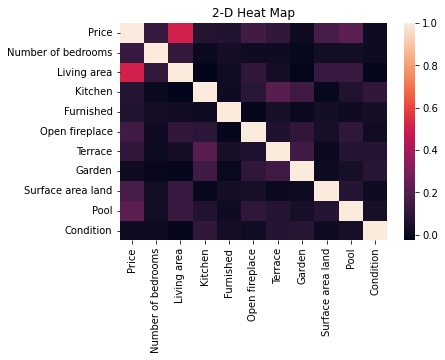

In [133]:
ax = sns.heatmap(df.corr())
  
plt.title( "2-D Heat Map" )
plt.show()

<BarContainer object of 14 artists>

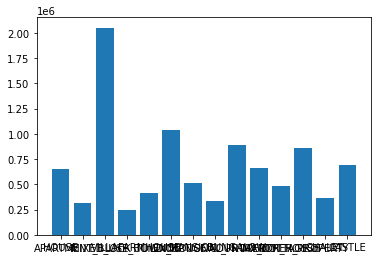

In [134]:
plt.bar(df["Property subtype"].drop_duplicates(), df.groupby("Property subtype").mean().Price)

In [135]:
df.groupby("Property subtype").mean().Price

Property subtype
APARTMENT_BLOCK         6.527246e+05
BUNGALOW                3.141900e+05
CASTLE                  2.050000e+06
CHALET                  2.445000e+05
COUNTRY_COTTAGE         4.106226e+05
EXCEPTIONAL_PROPERTY    1.039724e+06
FARMHOUSE               5.097933e+05
HOUSE                   3.371955e+05
MANOR_HOUSE             8.921667e+05
MANSION                 6.625279e+05
MIXED_USE_BUILDING      4.878384e+05
OTHER_PROPERTY          8.607353e+05
TOWN_HOUSE              3.626649e+05
VILLA                   6.968433e+05
Name: Price, dtype: float64

In [136]:
df["Property subtype"].drop_duplicates()

0                      HOUSE
26           APARTMENT_BLOCK
34                     VILLA
45        MIXED_USE_BUILDING
144                FARMHOUSE
187               TOWN_HOUSE
192                  MANSION
200     EXCEPTIONAL_PROPERTY
233                 BUNGALOW
458          COUNTRY_COTTAGE
591              MANOR_HOUSE
2050          OTHER_PROPERTY
2392                  CHALET
3075                  CASTLE
Name: Property subtype, dtype: object

In [137]:
X = train_df.drop("Price", axis=1)
y = train_df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
clf = GradientBoostingRegressor().fit(X_train, y_train)
clf.score(X_train, y_train)

0.7321374404914084

In [145]:
clf.score(X_test, y_test)

0.6488450081164221